<a href="https://colab.research.google.com/github/Isdra77/VisionArtificial/blob/Pr%C3%A1ctica-4/Copia_de_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Crear las carpetas para subir las imagenes
!mkdir cuchillos
!mkdir tenedores
!mkdir cucharas

mkdir: cannot create directory ‘cuchillos’: File exists
mkdir: cannot create directory ‘tenedores’: File exists
mkdir: cannot create directory ‘cucharas’: File exists


In [3]:
#Entrar en cada carpeta y descomprimir el archivo zip
%cd cuchillos
!unzip cuchillos.zip
%cd ..

%cd tenedores
!unzip tenedores.zip
%cd ..

%cd cucharas
!unzip cucharas.zip
%cd ..

/content/cuchillos
Archive:  cuchillos.zip
  inflating: cuchillo (1).jpg        
  inflating: cuchillo (2).jpg        
  inflating: cuchillo (3).jpg        
  inflating: cuchillo (4).jpg        
  inflating: cuchillo (5).jpg        
  inflating: cuchillo (6).jpg        
  inflating: cuchillo (7).jpg        
  inflating: cuchillo (8).jpg        
  inflating: cuchillo (9).jpg        
  inflating: cuchillo (10).jpg       
  inflating: cuchillo (11).jpg       
  inflating: cuchillo (12).jpg       
  inflating: cuchillo (13).jpg       
  inflating: cuchillo (14).jpg       
  inflating: cuchillo (15).jpg       
  inflating: cuchillo (16).jpg       
  inflating: cuchillo (17).jpg       
  inflating: cuchillo (18).jpg       
  inflating: cuchillo (19).jpg       
  inflating: cuchillo (20).jpg       
  inflating: cuchillo (21).jpg       
  inflating: cuchillo (22).jpg       
  inflating: cuchillo (23).jpg       
  inflating: cuchillo (24).jpg       
  inflating: cuchillo (25).jpg       
  infla

In [ ]:
#Eliminar alguna carpeta
!rm -fr #ruta de la carpeta



In [4]:
#Borrar los archivo ZIP
!rm -rf /content/cucharas/cucharas.zip
!rm -rf /content/cuchillos/cuchillos.zip
!rm -rf /content/tenedores/tenedores.zip

In [5]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/cucharas | wc -l #100
!ls /content/cuchillos | wc -l #100
!ls /content/tenedores | wc -l #100

100
100
100


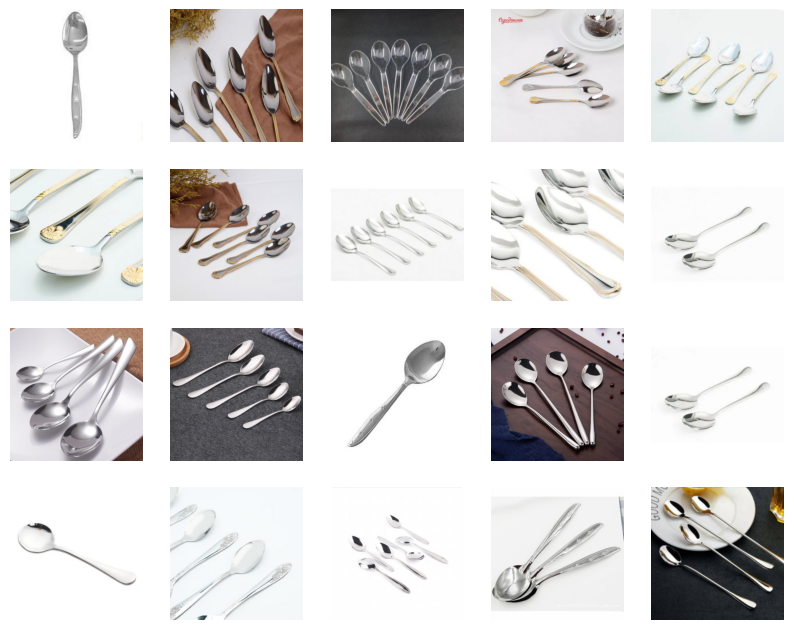

In [9]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

carpeta = "/content/cucharas"
imagenes = sorted(os.listdir(carpeta))  # Lista de archivos en la carpeta

# Filtrar solo archivos de imagen (evitar directorios)
imagenes = [img for img in imagenes if os.path.isfile(os.path.join(carpeta, img))]

# Graficar las primeras 25 imágenes
plt.figure(figsize=(10, 10))
for i, nombreimg in enumerate(imagenes[:20]):
    plt.subplot(5, 5, i + 1)
    imagen = mpimg.imread(os.path.join(carpeta, nombreimg))
    plt.imshow(imagen)
    plt.axis("off")  # Ocultar ejes
plt.show()


In [10]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/cuchillo
!mkdir dataset/tenedor
!mkdir dataset/cuchara

In [11]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 100 (el num. menor de imagenes que subi)

import os
import shutil

carpeta_fuente = "/content/cuchillos/"
carpeta_destino = "/content/dataset/cuchillo"

# Crear la carpeta de destino si no existe
os.makedirs(carpeta_destino, exist_ok=True)

# Obtener la lista de archivos en la carpeta fuente
imagenes = sorted(os.listdir(carpeta_fuente))

# Filtrar solo archivos de imagen (evitar directorios)
imagenes = [img for img in imagenes if os.path.isfile(os.path.join(carpeta_fuente, img))]

# Copiar los primeros 100 archivos
for i, nombreimg in enumerate(imagenes[:100]):
    shutil.copy(os.path.join(carpeta_fuente, nombreimg), os.path.join(carpeta_destino, nombreimg))

print("Copia completada con éxito.")


Copia completada con éxito.


In [12]:

import os
import shutil

carpeta_fuente = "/content/cucharas"
carpeta_destino = "/content/dataset/cuchara"

# Crear la carpeta de destino si no existe
os.makedirs(carpeta_destino, exist_ok=True)

# Obtener la lista de archivos en la carpeta fuente
imagenes = sorted(os.listdir(carpeta_fuente))

# Filtrar solo archivos de imagen (evitar directorios)
imagenes = [img for img in imagenes if os.path.isfile(os.path.join(carpeta_fuente, img))]

# Copiar los primeros 100 archivos
for i, nombreimg in enumerate(imagenes[:100]):
    shutil.copy(os.path.join(carpeta_fuente, nombreimg), os.path.join(carpeta_destino, nombreimg))

print("Copia completada con éxito.")


Copia completada con éxito.


In [13]:
import os
import shutil

carpeta_fuente = "/content/tenedores"
carpeta_destino = "/content/dataset/tenedor"

# Crear la carpeta de destino si no existe
os.makedirs(carpeta_destino, exist_ok=True)

# Obtener la lista de archivos en la carpeta fuente
imagenes = sorted(os.listdir(carpeta_fuente))

# Filtrar solo archivos de imagen (evitar directorios)
imagenes = [img for img in imagenes if os.path.isfile(os.path.join(carpeta_fuente, img))]

# Copiar los primeros 100 archivos
for i, nombreimg in enumerate(imagenes[:100]):
    shutil.copy(os.path.join(carpeta_fuente, nombreimg), os.path.join(carpeta_destino, nombreimg))

print("Copia completada con éxito.")


Copia completada con éxito.


In [14]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/cuchara | wc -l
!ls /content/dataset/cuchillo | wc -l
!ls /content/dataset/tenedor | wc -l

100
100
100


In [15]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir el tamaño de las imágenes y el tamaño de lote
IMG_SIZE = 160  # Tamaño de entrada para MobileNetV2 (160x160 píxeles)
BATCH_SIZE = 32  # Cantidad de imágenes procesadas en cada iteración

# Crear un generador de imágenes con preprocesamiento
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normaliza los valores de los píxeles al rango [0,1]
    validation_split=0.2  # Separa el 20% de las imágenes para validación
)

# Cargar imágenes de entrenamiento en lotes desde la carpeta 'dataset'
train_data = datagen.flow_from_directory(
    "dataset",  # Ruta del dataset que contiene subcarpetas para cada clase
    target_size=(IMG_SIZE, IMG_SIZE),  # Redimensiona imágenes al tamaño esperado por el modelo
    batch_size=BATCH_SIZE,  # Número de imágenes por lote
    class_mode="categorical",  # Indica que hay múltiples clases (categórico = one-hot encoding)
    subset="training"  # Usa el 80% de las imágenes para entrenamiento
)

# Cargar imágenes de validación en lotes
val_data = datagen.flow_from_directory(
    "dataset",  # Mismo dataset, pero con el conjunto de validación
    target_size=(IMG_SIZE, IMG_SIZE),  # Redimensiona al mismo tamaño
    batch_size=BATCH_SIZE,  # Lote de imágenes para validación
    class_mode="categorical",  # Clasificación con múltiples clases
    subset="validation"  # Usa el 20% de las imágenes para validación
)

# Mostrar las clases detectadas y su índice asignado
print(train_data.class_indices)
# Salida esperada: {'cucharas': 0, 'tenedores': 1, 'cuchillos': 2}


Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
{'cuchara': 0, 'cuchillo': 1, 'tenedor': 2}


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Cargar MobileNetV2 sin la última capa de clasificación
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),  # Dimensiones de entrada (160x160 píxeles, 3 canales RGB)
    include_top=False,  # No incluir la última capa completamente conectada (para personalizar la clasificación)
    weights="imagenet"  # Usar pesos preentrenados en ImageNet
)

# Congelar las capas del modelo base para mantener los pesos preentrenados
base_model.trainable = False

# Construcción del modelo final agregando capas personalizadas
model = models.Sequential([
    base_model,  # Se usa MobileNetV2 como extractor de características
    layers.GlobalAveragePooling2D(),  # Convierte los mapas de características en un vector de tamaño fijo
    layers.Dense(128, activation="relu"),  # Capa densa con 128 neuronas y activación ReLU para que las redes neuronales aprenda representaciones complejas
    layers.Dropout(0.2),  # implica que el 20% de las neuronas en esa capa se desactivarán aleatoriamente durante el entrenamiento, ayudando a prevenir el sobreajuste.
    layers.Dense(3, activation="softmax")  # Capa de salida con 3 neuronas (para cucharas, tenedores y cuchillos)
])

# Compilar el modelo con función de pérdida y optimizador
model.compile(optimizer="adam",  # Optimizador Adam para aprendizaje eficiente
              loss="categorical_crossentropy",  # Pérdida para clasificación multiclase
              metrics=["accuracy"])  # Métrica de evaluación: precisión (accuracy)

# Mostrar resumen del modelo (estructura y cantidad de parámetros)
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [17]:
# Entrenar el modelo
history = model.fit(
    train_data,  # Datos de entrenamiento (usados para entrenar el modelo)
    epochs=50,  # Número de épocas (cuántas veces se entrenará el modelo sobre todo el dataset)
    validation_data=val_data  # Datos de validación (usados para evaluar el modelo en cada época)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6039 - loss: 0.9848 - val_accuracy: 0.9167 - val_loss: 0.2943
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9702 - loss: 0.1082 - val_accuracy: 0.9667 - val_loss: 0.1110
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 1.0000 - loss: 0.0173 - val_accuracy: 0.9833 - val_loss: 0.0908
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 0.9833 - val_loss: 0.1017
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.9833 - val_loss: 0.1137
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.9833 - val_loss: 0.0940
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9833 - val_loss: 0.0738
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9833 - val_loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


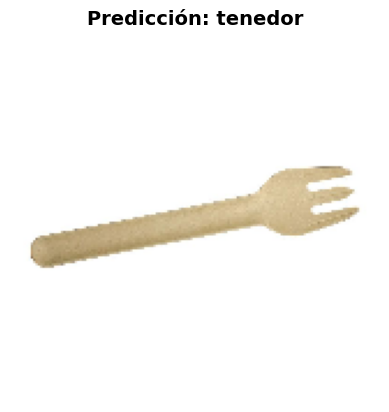

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Cargar una imagen de prueba
img_path = "/content/2.jpg"  # Cambia por una imagen de prueba
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))

# Convertir la imagen a un array y preprocesarla
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Hacer predicción
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Mostrar la predicción
class_labels = list(train_data.class_indices.keys())  # Obtener nombres de clases
predicted_label = class_labels[predicted_class]

# Graficar la imagen con la predicción
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicción: {predicted_label}", fontsize=14, fontweight="bold")
plt.show()
